Homework reflection 1

1. In Coding Quiz 1, you are asked to find the distance of the farthest match in a set.  Is this farthest match distance too far to be a meaningful match?  How can you decide this?

2. In Coding Quiz 1, there are two approaches to matching: 
(A) Picking the best match X = 0 corresponding to each X = 1 using Z values.
(B) Using radius_neighbors to pick all matches X = 0 within a distance of 0.2 of each X = 1.

Invent your own type of matching similar to 1 and 2 (or look one up on the internet), which has a different way to pick the matches in X = 0.  Clearly explain the approach you invented or found.

**Reflection 1 Answers**

1. The distance of the farthest match in the set was 0.07905. To decide whether to determine this match distance is too far to be considered a match, it has to be compared with the distribution of the other distances. When comparing this Z value difference between treated and untreated to the other calculated distances, it would be helpful to define a threshold, for example 10% of all distances, where if the distances is in this top 10%, it would be deemed too far. In this case, the distance is not too far and can still be deemed to be a meaningful match

2. A new type of matching I found is radius-limited matching with k controls. Each treated unit would be matched with k control units based on Z value. k defines the max number of matches per treated unit, and similar to approach (B), the radius is the maximum acceptable distance. If fewer than k controls fall in range for a sample, then match as many as available. This approach differs in that it avoids flooding with too many low-quality matches since the parameter k controls the match count variability for each sample. 

Homework reflection 2

1. Invent an example situation that would use fixed effects.

2. Write a Python program that performs a bootstrap simulation to find the variance in the mean of the Pareto distribution when different samples are taken.  Explain what you had to do for this.  As you make the full sample size bigger (for the same distribution), what happens to the variance of the mean of the samples?  Does it stay about the same, get smaller, or get bigger?

**Reflection 2 Answers**

1. An example situation that would use fixed effects is studying the relationship between employee productivity and remote work. Data would come from some companies that work remotely and other companies that have employees work in office. Naturally, different companies have different work cultures, management styles, etc. Fixed effects would isolate the effect of remote work on productivity from other company-specific differences by adding company-specific intercepts to the model. This controls for company-level differences and ensures productivity differences would be due to remote work and not company culture effects.

In [40]:
import numpy as np
from scipy.stats import pareto

# Pareto parameters

shape = 2.0  
sample_size = 100          
n_iterations = 10000        

# Generating data

generated_data = pareto.rvs(shape, size=sample_size)

bootstrap_means = []
for _ in range(n_iterations):
    sample = np.random.choice(generated_data, size=sample_size, replace=True)
    bootstrap_means.append(np.mean(sample))

bootstrap_variance = np.var(bootstrap_means, ddof=1)
print(f"Bootstrap variance of the sample mean: {bootstrap_variance:.6f}")

Bootstrap variance of the sample mean: 0.495483


2. A Pareto distribution had to be created first through scipy.stats, and random bootstrap samples were taken. The means of these samples were aggregated to a list and the variance of these means were then calculated to get the final answer of the variance of the mean of the Pareto distribution. When increasing the sample size, the variance of the mean gets smaller. This is because the Central Limit Theorem states that the sample means become more stable as sample size increases. Therefore, when sample size is increased above to 1000 or 10,000 for example, the variance gets progressively smaller.

Homework reflection 3

1. In the event study in Coding Quiz 3, how would we go about testing for a change in the second derivative as well?

2. Create your own scenario that illustrates differences-in-differences. Describe the story behind the data and show whether there is a nonzero treatment effect.

**Reflection 3 Answers**

1. To test for a change in the second derivative, the regression model would need to include quadratic terms. This would capture the change in the acceleration of the outcome over time. For example, adding a time^2 term and a time^2 after term. Finding the beta value for the additional time^2 after term would note the rate of change of the slope after the event.

2. Sticking with the remote work and productivty example, a differences-in-differences scenario could be the following: Two departments are in a company, with one receiving a work from home policy, while the other does not. Data is collected before and after the policy is implemented as to each department's productivity. The difference in difference is calculated as 16, indicating a nonzero treatment effect

In [43]:
dep_A = {'Before': 71, 'After': 90}
dep_B = {'Before': 76, 'After': 79}

treat_effect = (dep_A['After']-dep_A['Before']) - (dep_B['After']-dep_B['Before'])
treat_effect

16

Homework reflection 4

1. The Coding Quiz gives two options for instrumental variables.  For the second item (dividing the range of W into multiple ranges), explain how you did it, show your code, and discuss any issues you encountered.

2. Plot the college outcome (Y) vs. the test score (X) in a small range of test scores around 80. On the plot, compare it with the Y probability predicted by logistic regression. The ground truth Y value is 0 or 1; don't just plot 0 or 1 - that will make it unreadable.  Find some way to make it look better than that.

**Reflection 4 Answers**

1. First, had to divide the W range into multiple ranges, in this case, 10 bins. Then created a for loop to calculate for each W bin range the mean Y value and mean X value for Z = 1 and Z = 0. The differences and ratios were calculated in order to find the effects for each range, and then finally an average was taken of the effects across all ranges. 

In [47]:
import numpy as np
import pandas as pd

num_bins = 10
df = pd.read_csv('homework_4.1.csv')
df['W_bin'] = pd.cut(df['W'], bins=num_bins)

effects = []

for _, group in df.groupby('W_bin'):
    mean_Y_Z1 = group[group['Z'] == 1]['Y'].mean()
    mean_Y_Z0 = group[group['Z'] == 0]['Y'].mean()
    mean_X_Z1 = group[group['Z'] == 1]['X'].mean()
    mean_X_Z0 = group[group['Z'] == 0]['X'].mean()

    delta_Y = mean_Y_Z1 - mean_Y_Z0
    delta_X = mean_X_Z1 - mean_X_Z0

    if np.isfinite(delta_Y) and np.isfinite(delta_X) and delta_X != 0:
        effects.append(delta_Y / delta_X)

average__effect = np.mean(effects)
average__effect

/var/folders/2r/46mxdql52bn78bp6pr2cps340000gn/T/ipykernel_40144/1460217934.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in df.groupby('W_bin'):


np.float64(0.9085420555919094)

2. See below. College acceptance outcome and test score were plotted against each other in a range around 80. Instead of just plotting 0 or 1 for the Y-value, the logistic regression curve was also plotted to see how the probability changes over time as the test scores increase/decrease in this range of 70-90. This gives more insight as opposed to just seeing the final college outcome (0 or 1) alone.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


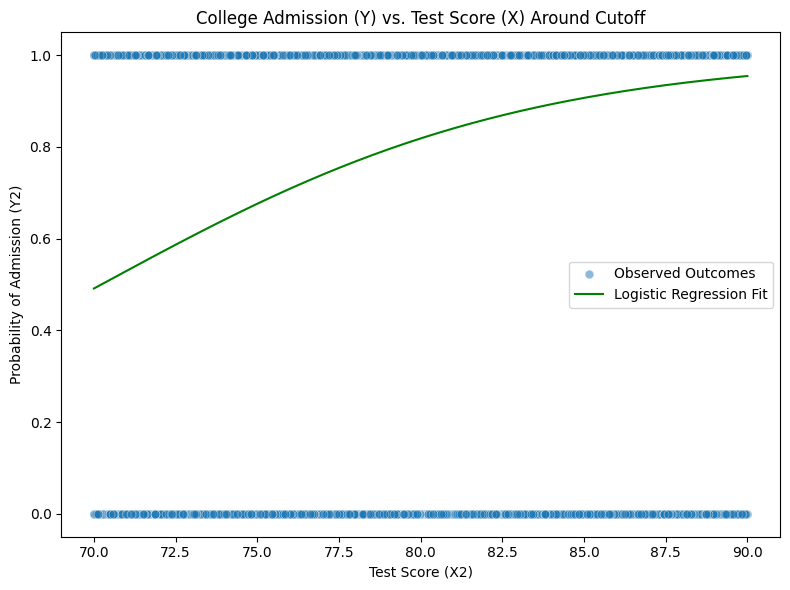

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

df_a = pd.read_csv('homework_4.2.a.csv')
df_b = pd.read_csv('homework_4.2.b.csv')

# defining range of test scores around 80 +/- 10
cutoff = 80
band_width = 10
df_b_band = df_b[(df_b['X2'] >= cutoff - band_width) & (df_b['X2'] <= cutoff + band_width)].copy()

# logistic regression
X_band = df_b_band[['X2']]
y_band = df_b_band['Y2']
log_reg = LogisticRegression()
log_reg.fit(X_band, y_band)

x_vals = np.linspace(cutoff - band_width, cutoff + band_width, 200).reshape(-1, 1)
y_probs = log_reg.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='X2', y='Y2', data=df_b_band, alpha=0.5, s=40, label='Observed Outcomes')
sns.lineplot(x=x_vals.flatten(), y=y_probs, color='green', label='Logistic Regression Fit')
plt.title("College Admission (Y) vs. Test Score (X) Around Cutoff")
plt.xlabel("Test Score (X2)")
plt.ylabel("Probability of Admission (Y2)")
plt.legend()
plt.tight_layout()
plt.show()